<p><b>We have a dataset containing prices of used BMW cars. We are going to analyze this dataset
and build a prediction function that can predict a price by taking mileage and age of the car
as input. We will use sklearn train_test_split method to split training and testing dataset</b></p>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("carprices.csv")
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


#### Car Mileage Vs Sell Price ($)

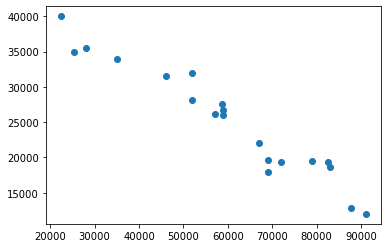

In [4]:
plt.scatter(df['Mileage'],df['Sell Price($)'])
plt.show()

#### Car Age Vs Sell Price ($)

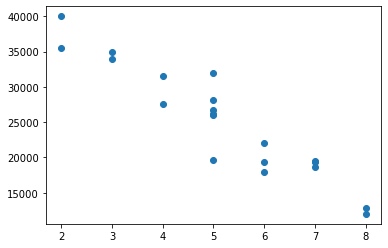

In [5]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])
plt.show()

#### Observation
Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)

The approach we are going to use here is to split available data in two sets
- Training: We will train our model on this dataset
- Testing: We will use this subset to make actual predictions using trained model

The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.

In [8]:
X = df[['Mileage','Age(yrs)']]
y = df['Sell Price($)']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10) 

In [23]:
X_train

,Mileage,Age(yrs)
13,58780,4
2,57000,5
14,82450,7
8,91000,8
17,69000,5
16,28000,2
19,52000,5
12,59000,5
11,79000,7
1,35000,3


In [24]:
X_test

,Mileage,Age(yrs)
7,72000,6
10,83000,7
5,59000,5
6,52000,5
3,22500,2
18,87600,8


In [25]:
y_train

13    27500
2     26100
14    19400
8     12000
17    19700
16    35500
19    28200
12    26000
11    19500
1     34000
0     18000
15    35000
4     31500
9     22000
Name: Sell Price($), dtype: int64

In [26]:
y_test

7     19300
10    18700
5     26750
6     32000
3     40000
18    12800
Name: Sell Price($), dtype: int64

#### Lets run linear regression model now

In [27]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [28]:
X_test

,Mileage,Age(yrs)
7,72000,6
10,83000,7
5,59000,5
6,52000,5
3,22500,2
18,87600,8


In [29]:
ypred = clf.predict(X_test)

In [17]:
y_test

0     18000
17    19700
15    35000
1     34000
8     12000
5     26750
Name: Sell Price($), dtype: int64

In [30]:
clf.score(X_test, y_test)

0.921242248377633

In [31]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE:",MSE)

MSE: 6537533.291388392


In [32]:
sum((y_test-ypred)**2)/len(ypred) #this is how we can calculate MSE.

6537533.291388392

In [33]:
Results = X_test.copy()
Results['Actual']=y_test
Results['Predicted']=ypred
Results.head()

,Mileage,Age(yrs),Actual,Predicted
7,72000,6,19300,20668.527226
10,83000,7,18700,16762.332422
5,59000,5,26750,25160.183810
6,52000,5,32000,27209.300039
3,22500,2,40000,37903.326337


[]

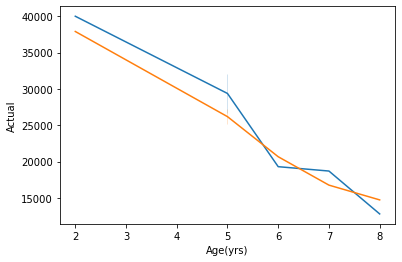

In [36]:
sns.lineplot(x='Age(yrs)',y='Actual',data=Results)
sns.lineplot(x='Age(yrs)',y='Predicted',data=Results)
plt.plot()